In [1]:
import sys
lib_dir = r'/home/fra/Project/pyProj/statlib'
sys.path.append(lib_dir)

In [2]:
import learnbayes as lb
import learn_metropolis as lm
import numpy as np

In [3]:
# flat prior
grid_points = 200
p_grid = np.linspace(0, 1, grid_points)
prior = np.repeat(1, grid_points)  # uniform density

In [4]:
import matplotlib.pyplot as plt
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

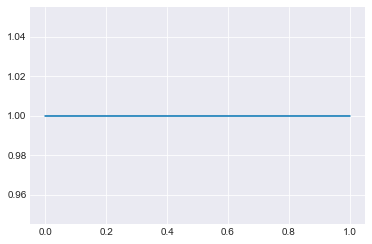

In [5]:
plt.plot(p_grid, prior)

In [6]:
# grid approx of binomial distribution
likelihood = [lb.binomial_pdf(6, 9, p) for p in p_grid]

In [7]:
# true binomial distribution
binomial_likelihood = stats.binom.pmf(6, 9, p_grid)

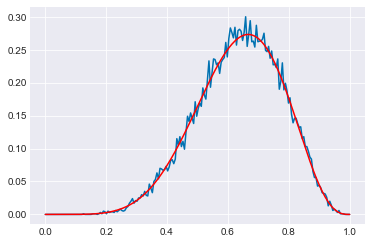

In [8]:
# compare grid approx with analytical distribution
plt.plot(p_grid, likelihood)
plt.plot(p_grid, binomial_likelihood, 'r')

### Coin flipping posterior Simulation

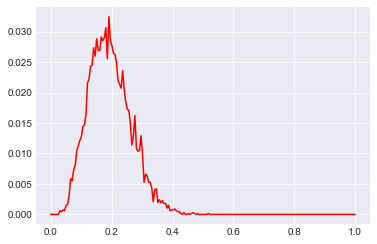

In [9]:
posterior = lb.sampling_coin_flipping_dist(5, 29, prior, p_grid)
plt.plot(p_grid, posterior, 'r')

In [10]:
from imp import reload

In [11]:
reload(lb)

<module 'learnbayes' from '/home/fra/Project/pyProj/statlib/learnbayes.py'>

In [12]:
analytical_posterior = lb.analytical_coin_flipping_dist(5, 29, prior, p_grid)

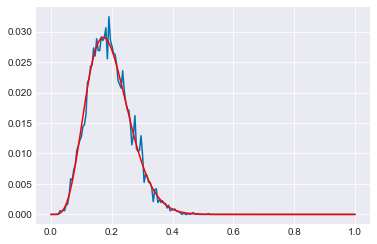

In [13]:
plt.plot(p_grid, posterior)
plt.plot(p_grid, analytical_posterior, 'r')

### Animation

In [14]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

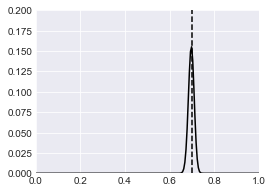

In [15]:
fig, ax = plt.subplots(figsize=(4, 3))
# theta = 0.7
ud = lb.UpdateDist(ax)
ud.setup(200, 100, 0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(50), init_func=ud.start,
                     interval=100, blit=True, repeat=False)
HTML(anim.to_html5_video())

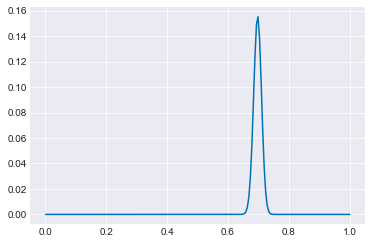

In [16]:
plt.plot(ud.x, ud.prior)